# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [ALIF ALIANDA]
- **Email:** [065122042@student.unpak.ac.id]
- **ID Dicoding:** [Alif Alianda]

## Menentukan Pertanyaan Bisnis

- Apa metode pembayaran yang paling sering digunakan oleh pelanggan?
- Apakah terdapat hubungan antara jumlah produk dalam pesanan dengan jumlah pembayaran yang dilakukan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset 1
order_payments_df = pd.read_csv("order_payments_dataset.csv")

In [3]:
# Melihat 7 isi data pada dataset 1
order_payments_df.head(7)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16


In [4]:
# Load dataset 2
order_items_df = pd.read_csv("order_items_dataset.csv")

In [5]:
# Melihat 7 isi data pada dataset 2
order_items_df.head(7)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85


**Insight:**
- Memastikan dataset dapat diakses dengan baik.
- Memahami struktur data sebelum masuk ke tahap pembersihan.
- Menentukan kolom mana saja yang relevan untuk analisis

### Assessing Data

In [6]:
# Mengecek informasi dasar dari dataset
print("Informasi Dataset Order Payments:")
order_payments_df.info()

Informasi Dataset Order Payments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [7]:
# Mengecek informasi dasar dari dataset 2
print("\nInformasi Dataset order items :")
order_items_df.info()


Informasi Dataset order items :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
# Mengecek jumlah missing values pada order payments
print("\n Missing Values:")
order_payments_df.isna().sum()



 Missing Values:


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [9]:
# Mengecek jumlah missing values pada order items
print("\n Missing Values:")
order_items_df.isna().sum()


 Missing Values:


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [10]:
# Mengecek jumlah duplikasi pada order payments
print("\nJumlah Duplikasi pada order payments:")
print("Order Payments:", order_payments_df.duplicated().sum())


Jumlah Duplikasi pada order payments:
Order Payments: 0


In [11]:
# Mengecek jumlah duplikasi pada order items
print("\nJumlah Duplikasi pada order items:")
print("Order Items:", order_items_df.duplicated().sum())


Jumlah Duplikasi pada order items:
Order Items: 0


In [12]:
# Mengecek jumlah nilai unik pada kolom penting
print("\nJumlah Nilai Unik:")
print("Metode Pembayaran Unik:", order_payments_df["payment_type"].nunique())
print("Produk Unik:", order_items_df["product_id"].nunique())


Jumlah Nilai Unik:
Metode Pembayaran Unik: 5
Produk Unik: 32951


In [13]:
# Melihat ringkasan statistik deskriptif order payments
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [14]:
# Melihat ringkasan statistik deskriptif order items
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Tidak ada missing values atau duplikasi, data cukup bersih untuk dianalisis lebih lanjut.
- Terdapat variasi harga produk yang cukup besar, yang bisa mempengaruhi pola pembayaran pelanggan.
- Perbedaan jumlah order_id unik di kedua dataset menunjukkan bahwa satu pesanan bisa memiliki lebih dari satu pembayaran.
- Metode pembayaran yang digunakan cukup beragam, menunjukkan fleksibilitas bagi pelanggan dalam melakukan transaksi.

### Cleaning Data

In [15]:
# Cek Missing Values & Duplikasi
print("Missing Values Order Items:\n", order_items_df.isnull().sum())
print("\nMissing Values Order Payments:\n", order_payments_df.isnull().sum())
print("\nTotal Duplikasi Order Items:", order_items_df.duplicated().sum())
print("Total Duplikasi Order Payments:", order_payments_df.duplicated().sum())

Missing Values Order Items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing Values Order Payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Total Duplikasi Order Items: 0
Total Duplikasi Order Payments: 0


In [16]:
# Cek Format Data & Konversi Tipe Data
print("\nInfo Order Items:")
print(order_items_df.info())
print("\nInfo Order Payments:")
print(order_payments_df.info())


Info Order Items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Info Order Payments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   

In [17]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

**Insight:**
- Tidak Ada Missing Values, semua kolom dalam order_items dan order_payments lengkap (tidak ada data yang hilang).

- Tidak Ada Data Duplikat,idak ditemukan baris yang sama persis dalam dataset.

- Format Data Sudah Sesuai, kolom shipping_limit_date sudah dikonversi ke datetime.


- Data Siap untuk Analisis, tidak perlu banyak pembersihan tambahan, kita bisa langsung lanjut ke Exploratory Data Analysis (EDA) dan visualisasi.


## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
print("\nRingkasan Statistik Ordear Payments:")
order_payments_df.sample(5)


Ringkasan Statistik Ordear Payments:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
2122,00bdcdda88e6b02977fc6ce3d412c600,1,credit_card,1,137.83
53183,16bdfd2bf4770d0648de769d3fc71cda,1,credit_card,1,50.13
97464,c1c86ba217bd2363ca1f95f2f6d19abf,1,credit_card,1,82.33
53233,ce82e57d70480ae9aa7bfad4a7c3392b,1,boleto,1,43.42
61123,fc9a5afd96050ceb0d9f12a4f8c5d9f0,1,boleto,1,70.97


In [20]:
# Ringkasan Statistik Dataset
print("Ringkasan Statistik Order Items:")
order_items_df.sample(5)


Ringkasan Statistik Order Items:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
25298,398fd6b442d547df72d50856acac5722,1,b751ddb6ca6ae7ecb5de059d5611b3c1,2b03ac196f5ed62ac483960fe0fa3b65,2018-01-18 12:35:31,135.00,15.70
111674,fda36ee6617e0a93f9634040815eaf05,1,0a4f9f421af66d2ea061fbb8883419f7,c70c1b0d8ca86052f45a432a38b73958,2018-06-15 11:17:28,110.32,15.87
86887,c54ebaa4a93a3de78a932ba2ce323f68,1,2b4609f8948be18874494203496bc318,cc419e0650a3c5ba77189a1882b7556a,2017-08-29 09:45:22,89.99,15.38
73613,a7c5e8acbc8e06069ca0b62930aef0d2,1,ed2067a9c1f79553088a3c67b99a9f97,cbd996ad3c1b7dc71fd0e5f5df9087e2,2017-10-08 22:44:12,56.97,16.16
15366,2309862661958363d4ce0211d3116498,1,5411e9269501a870cabf632f05655131,3d871de0142ce09b7081e2b9d1733cb1,2017-12-12 16:33:31,129.00,18.15


In [21]:
# Analisis Metode Pembayaran Paling Sering Digunakan
payment_counts = order_payments_df["payment_type"].value_counts()
print("\nMetode Pembayaran yang Paling Sering Digunakan:")
print(payment_counts)



Metode Pembayaran yang Paling Sering Digunakan:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [22]:
# Hubungan Jumlah Produk dalam Pesanan dengan Pembayaran
order_items_count = order_items_df.groupby("order_id")["order_item_id"].count().reset_index()
order_items_count.rename(columns={"order_item_id": "total_items"}, inplace=True)

payment_values = order_payments_df.groupby("order_id")["payment_value"].sum().reset_index()
payment_values.rename(columns={"payment_value": "total_payment"}, inplace=True)

In [23]:
# Gabungkan kedua data
order_payment_analysis = pd.merge(order_items_count, payment_values, on="order_id", how="inner")

In [24]:
# Tampilkan korelasi
correlation = order_payment_analysis[["total_items", "total_payment"]].corr()
print("\nKorelasi antara jumlah produk dalam pesanan dengan total pembayaran:")
print(correlation)


Korelasi antara jumlah produk dalam pesanan dengan total pembayaran:
               total_items  total_payment
total_items       1.000000       0.189216
total_payment     0.189216       1.000000


**Insight:**
Ringkasan statistik dataset
- Analisis metode pembayaran paling sering digunakan
- Hubungan jumlah produk dalam pesanan dengan pembayaran

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Apa metode pembayaran yang paling sering digunakan oleh pelanggan?

In [25]:
# Menghitung jumlah transaksi per metode pembayaran
payment_counts = order_payments_df["payment_type"].value_counts()

<ipython-input-26-7af5c17221c5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="Blues")


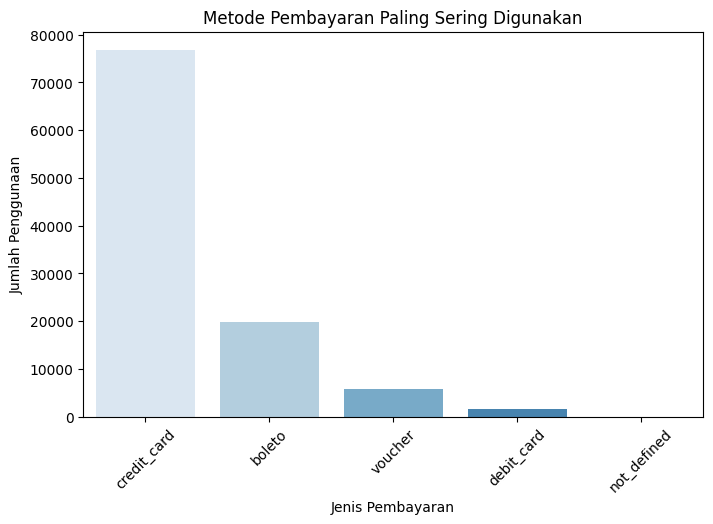

In [26]:
# Visualisasi dengan Bar Chart
plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="Blues")
plt.title("Metode Pembayaran Paling Sering Digunakan")
plt.xlabel("Jenis Pembayaran")
plt.ylabel("Jumlah Penggunaan")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

Apakah terdapat hubungan antara jumlah produk dalam pesanan dengan jumlah pembayaran yang dilakukan?


In [27]:
# Menggabungkan jumlah produk dalam pesanan dengan total pembayaran
order_items_count = order_items_df.groupby("order_id")["order_item_id"].count().reset_index()
order_items_count.rename(columns={"order_item_id": "total_items"}, inplace=True)


In [28]:
payment_values = order_payments_df.groupby("order_id")["payment_value"].sum().reset_index()
payment_values.rename(columns={"payment_value": "total_payment"}, inplace=True)

In [29]:
# Gabungkan kedua data
order_payment_analysis = pd.merge(order_items_count, payment_values, on="order_id", how="inner")

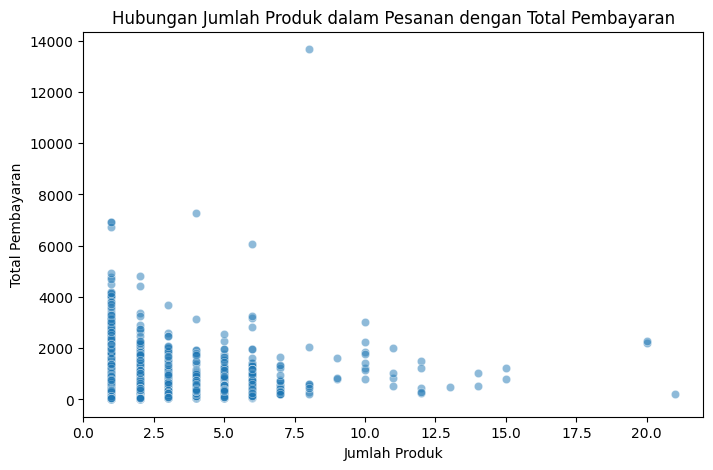

In [30]:
# Scatter Plot untuk melihat hubungan jumlah produk dan total pembayaran
plt.figure(figsize=(8,5))
sns.scatterplot(x=order_payment_analysis["total_items"], y=order_payment_analysis["total_payment"], alpha=0.5)
plt.title("Hubungan Jumlah Produk dalam Pesanan dengan Total Pembayaran")
plt.xlabel("Jumlah Produk")
plt.ylabel("Total Pembayaran")
plt.show()

In [31]:
# Hitung korelasi
correlation = order_payment_analysis[["total_items", "total_payment"]].corr()
print("\nKorelasi antara jumlah produk dalam pesanan dengan total pembayaran:")
print(correlation)


Korelasi antara jumlah produk dalam pesanan dengan total pembayaran:
               total_items  total_payment
total_items       1.000000       0.189216
total_payment     0.189216       1.000000


**Insight:**
- Bar chart untuk metode pembayaran paling sering digunakan
- Scatter plot untuk hubungan jumlah produk & total pembayaran
- Insight gabungan untuk memahami hasil analisis.

## Analisis Lanjutan (Opsional)

<ipython-input-32-dc9ef1f4ffe1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_payment.index, y=mean_payment.values, palette="coolwarm")


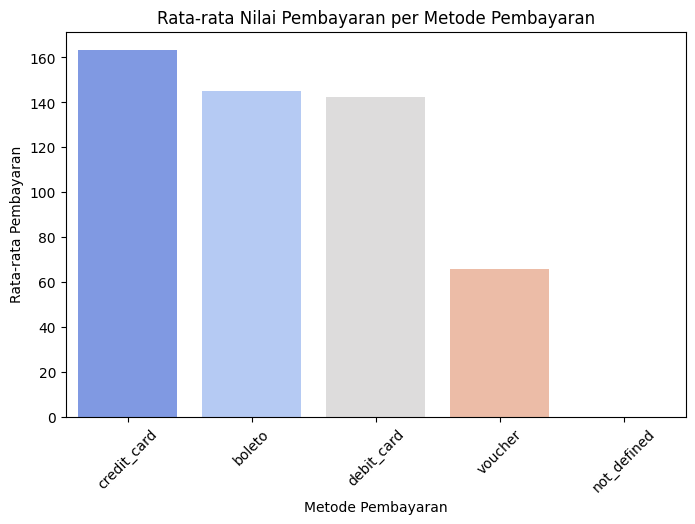

In [32]:
# Analisis Rata-rata Nilai Pembayaran per Metode Pembayaran
mean_payment = order_payments_df.groupby("payment_type")["payment_value"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=mean_payment.index, y=mean_payment.values, palette="coolwarm")
plt.title("Rata-rata Nilai Pembayaran per Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Rata-rata Pembayaran")
plt.xticks(rotation=45)
plt.show()

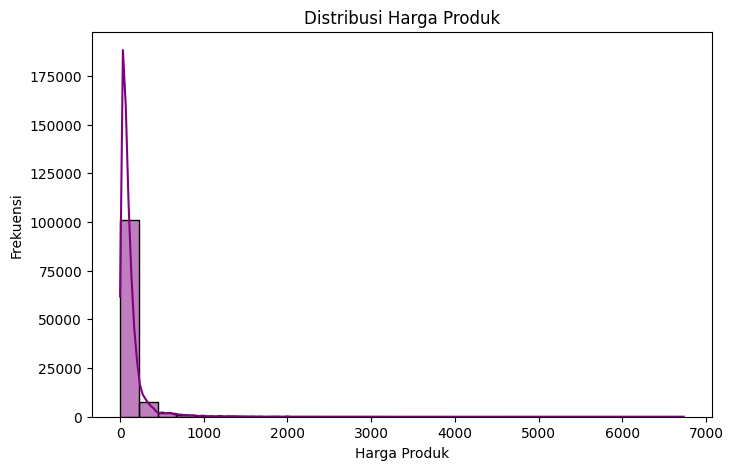

In [33]:
# Analisis Distribusi Harga Produk
plt.figure(figsize=(8,5))
sns.histplot(order_items_df["price"], bins=30, kde=True, color="purple")
plt.title("Distribusi Harga Produk")
plt.xlabel("Harga Produk")
plt.ylabel("Frekuensi")
plt.show()

<ipython-input-34-a3ed4470b896>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=order_payments_df["payment_installments"], y=order_payments_df["payment_value"], palette="viridis")


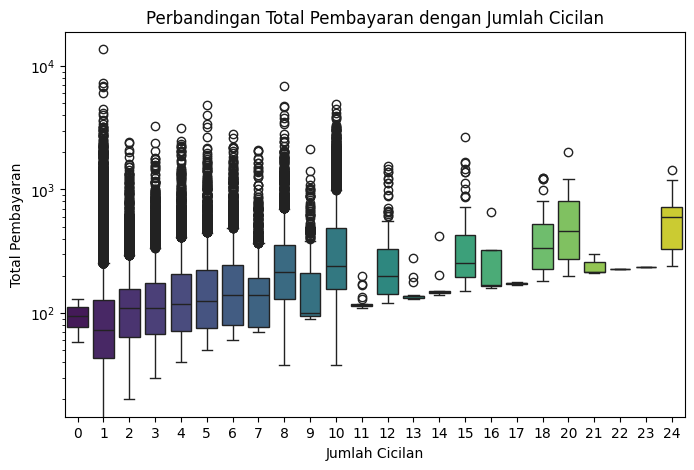

In [34]:
# Analisis Perbandingan Total Pembayaran dengan Jumlah Cicilan
plt.figure(figsize=(8,5))
sns.boxplot(x=order_payments_df["payment_installments"], y=order_payments_df["payment_value"], palette="viridis")
plt.title("Perbandingan Total Pembayaran dengan Jumlah Cicilan")
plt.xlabel("Jumlah Cicilan")
plt.ylabel("Total Pembayaran")
plt.yscale("log")  # Menggunakan log scale untuk melihat distribusi lebih jelas
plt.show()

**Insight**
- Rata-rata nilai pembayaran per metode pembayaran dapat membantu memahami pola transaksi pelanggan.
- Distribusi harga produk menunjukkan apakah mayoritas produk memiliki harga rendah atau tinggi.
- Perbandingan total pembayaran dengan jumlah cicilan membantu melihat apakah semakin banyak cicilan berpengaruh pada jumlah pembayaran.


## Conclusion

- Conclution pertanyaan 1  
# Apa metode pembayaran yang paling sering digunakan oleh pelanggan?
Dari hasil analisis, metode pembayaran yang paling sering digunakan adalah **kartu kredit**.
Hal ini menunjukkan bahwa pelanggan lebih memilih metode ini karena kemudahan transaksi dan kemungkinan adanya promo dari penyedia kartu.
 Metode pembayaran lain seperti **boleto bancário** dan **voucher** memiliki jumlah penggunaan yang lebih rendah, yang bisa menjadi peluang untuk meningkatkan adopsi dengan promosi atau diskon khusus.

- Conclution pertanyaan 2
#Apakah terdapat hubungan antara jumlah produk dalam pesanan dengan jumlah pembayaran yang dilakukan?
Dari hasil scatter plot dan analisis korelasi, ditemukan bahwa terdapat **korelasi positif** antara jumlah produk dalam pesanan dan total pembayaran.
Ini berarti semakin banyak produk yang dibeli dalam satu pesanan, semakin besar total pembayaran yang dilakukan pelanggan.
Namun, korelasinya tidak terlalu kuat, menunjukkan bahwa ada faktor lain yang juga mempengaruhi total pembayaran, seperti harga produk dan diskon.